In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor

In [71]:

# load data and inspect
#
df = pd.read_csv('../Datasets/austin_weather.csv')
#
print(df.head())
print(df.tail())

Date  TempHighF  TempAvgF  TempLowF DewPointHighF DewPointAvgF  \
0  2013-12-21         74        60        45            67           49   
1  2013-12-22         56        48        39            43           36   
2  2013-12-23         58        45        32            31           27   
3  2013-12-24         61        46        31            36           28   
4  2013-12-25         58        50        41            44           40   

  DewPointLowF HumidityHighPercent HumidityAvgPercent HumidityLowPercent  ...  \
0           43                  93                 75                 57  ...   
1           28                  93                 68                 43  ...   
2           23                  76                 52                 27  ...   
3           21                  89                 56                 22  ...   
4           36                  86                 71                 56  ...   

  SeaLevelPressureAvgInches SeaLevelPressureLowInches VisibilityHighMil

In [72]:
df = df[['Date', 'TempAvgF']]
df

,Date,TempAvgF
0,2013-12-21,60
1,2013-12-22,48
2,2013-12-23,45
3,2013-12-24,46
4,2013-12-25,50
...,...,...
1314,2017-07-27,89
1315,2017-07-28,91
1316,2017-07-29,92
1317,2017-07-30,93


In [73]:
df['Year'] = df.Date.str.slice(0,4)
df['Month'] = df.Date.str.slice(5,7)
df['Day'] = df.Date.str.slice(8,10)
df['MA'] = df.TempAvgF.rolling(20).mean()
# select Year 2016
df = df[df.Year == '2015'].reset_index()
df

,index,Date,TempAvgF,Year,Month,Day,MA
0,376,2015-01-01,37,2015,01,01,52.70
1,377,2015-01-02,41,2015,01,02,51.50
2,378,2015-01-03,51,2015,01,03,50.65
3,379,2015-01-04,43,2015,01,04,49.65
4,380,2015-01-05,41,2015,01,05,48.95
...,...,...,...,...,...,...,...
360,736,2015-12-27,55,2015,12,27,61.10
361,737,2015-12-28,41,2015,12,28,60.20
362,738,2015-12-29,43,2015,12,29,59.25
363,739,2015-12-30,49,2015,12,30,58.45


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     365 non-null    int64  
 1   Date      365 non-null    object 
 2   TempAvgF  365 non-null    int64  
 3   Year      365 non-null    object 
 4   Month     365 non-null    object 
 5   Day       365 non-null    object 
 6   MA        365 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 20.1+ KB


In [75]:
df['Day_of_Year'] = df.index+1
df

,index,Date,TempAvgF,Year,Month,Day,MA,Day_of_Year
0,376,2015-01-01,37,2015,01,01,52.70,1
1,377,2015-01-02,41,2015,01,02,51.50,2
2,378,2015-01-03,51,2015,01,03,50.65,3
3,379,2015-01-04,43,2015,01,04,49.65,4
4,380,2015-01-05,41,2015,01,05,48.95,5
...,...,...,...,...,...,...,...,...
360,736,2015-12-27,55,2015,12,27,61.10,361
361,737,2015-12-28,41,2015,12,28,60.20,362
362,738,2015-12-29,43,2015,12,29,59.25,363
363,739,2015-12-30,49,2015,12,30,58.45,364


In [76]:
# Create scaled X and Y data, scaling between 0 and 1 in each case.

x_min = df.Day_of_Year.min()
x_max = df.Day_of_Year.max()
x_rng = x_max - x_min
x_scaled = (df.Day_of_Year - x_min) / x_rng
x_train = x_scaled.ravel()

y_min = df.TempAvgF.min()
y_max = df.TempAvgF.max()
y_rng = y_max - y_min
y_scaled = (df.TempAvgF - y_min) / y_rng
y_train = y_scaled.ravel()

print(x_scaled)
print(x_train)
print(y_scaled)
print(y_train)

0      0.000000
1      0.002747
2      0.005495
3      0.008242
4      0.010989
         ...   
360    0.989011
361    0.991758
362    0.994505
363    0.997253
364    1.000000
Name: Day_of_Year, Length: 365, dtype: float64
[0.         0.00274725 0.00549451 0.00824176 0.01098901 0.01373626
 0.01648352 0.01923077 0.02197802 0.02472527 0.02747253 0.03021978
 0.03296703 0.03571429 0.03846154 0.04120879 0.04395604 0.0467033
 0.04945055 0.0521978  0.05494505 0.05769231 0.06043956 0.06318681
 0.06593407 0.06868132 0.07142857 0.07417582 0.07692308 0.07967033
 0.08241758 0.08516484 0.08791209 0.09065934 0.09340659 0.09615385
 0.0989011  0.10164835 0.1043956  0.10714286 0.10989011 0.11263736
 0.11538462 0.11813187 0.12087912 0.12362637 0.12637363 0.12912088
 0.13186813 0.13461538 0.13736264 0.14010989 0.14285714 0.1456044
 0.14835165 0.1510989  0.15384615 0.15659341 0.15934066 0.16208791
 0.16483516 0.16758242 0.17032967 0.17307692 0.17582418 0.17857143
 0.18131868 0.18406593 0.18681319 0.189560

In [77]:
# Instantiate a model using SGDRegressor. Remember to set the NumPy random.seed() method.

np.random.seed(42)

model = SGDRegressor(
    loss = 'squared_loss',
    penalty = 'none', # The penalty (aka regularization term) to be used.
    max_iter = 100,
    learning_rate = 'constant',
    eta0 = 0.001, # The initial learning rate
    tol = 0.00001, # The stopping criterion.
)
model

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty='none', power_t=0.25,
             random_state=None, shuffle=True, tol=1e-05,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [78]:
# Fit the model.

model.fit(
    x_train.reshape(-1,1),
    y_train
)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty='none', power_t=0.25,
             random_state=None, shuffle=True, tol=1e-05,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [79]:
# Extract the rescaled model coefficients, Theta0 and Theta1, and print them.

Beta1 = y_rng / x_rng * model.coef_[0]
Beta0 = y_min + y_rng * model.intercept_[0] - Beta1 * x_min
print(Beta0)
print(Beta1)

61.75132616227943
0.04536024136972876


In [80]:
# Generate predictions using the scaled data, use the r2_score method to get the r2 value of the fit, and then print out r2.

y_pred = model.predict(x_train.reshape(-1,1))

r2 = r2_score(y_train, y_pred)
r2

0.09520308325892524

In [81]:
# Rescale the predictions to use for plotting.

x_pred = df.Day_of_Year
y_pred = y_pred * y_rng + y_min
y_pred

array([61.7966864 , 61.84204665, 61.88740689, 61.93276713, 61.97812737,
       62.02348761, 62.06884785, 62.11420809, 62.15956833, 62.20492858,
       62.25028882, 62.29564906, 62.3410093 , 62.38636954, 62.43172978,
       62.47709002, 62.52245027, 62.56781051, 62.61317075, 62.65853099,
       62.70389123, 62.74925147, 62.79461171, 62.83997196, 62.8853322 ,
       62.93069244, 62.97605268, 63.02141292, 63.06677316, 63.1121334 ,
       63.15749364, 63.20285389, 63.24821413, 63.29357437, 63.33893461,
       63.38429485, 63.42965509, 63.47501533, 63.52037558, 63.56573582,
       63.61109606, 63.6564563 , 63.70181654, 63.74717678, 63.79253702,
       63.83789727, 63.88325751, 63.92861775, 63.97397799, 64.01933823,
       64.06469847, 64.11005871, 64.15541895, 64.2007792 , 64.24613944,
       64.29149968, 64.33685992, 64.38222016, 64.4275804 , 64.47294064,
       64.51830089, 64.56366113, 64.60902137, 64.65438161, 64.69974185,
       64.74510209, 64.79046233, 64.83582258, 64.88118282, 64.92

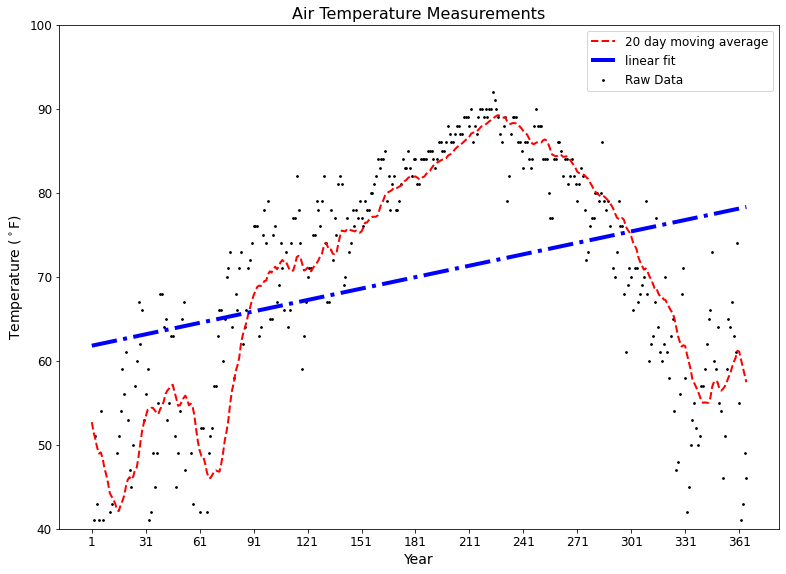

In [82]:
#Create a visualization with the raw data, the 20-day moving averages, and the new linear fit line. Include the model equation on the chart. 

fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
#
# Raw data
#
ax.scatter(df.Day_of_Year, df.TempAvgF, 
           label = 'Raw Data', 
           c = 'k',
           s = 3)

#
# moving average
#
ax.plot(df.Day_of_Year, df.MA, 
        c = "red",
        linestyle = '--',
        linewidth = 2,
        label = '20 day moving average')

#
# linear fit
#
ax.plot(x_pred, y_pred, 
        c = "blue",
        linestyle = '-.',
        linewidth = 4,
        label = 'linear fit')

#
ax.set_title('Air Temperature Measurements',
             fontsize = 16)
ax.set_xlabel('Year', 
              fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$F)', 
              fontsize = 14)
ax.set_ylim(40, 100)

tick_days = range(df.Day_of_Year.min(), df.Day_of_Year.max(), 30)
ax.set_xticks(tick_days)

ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)
plt.show()